In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import random

In [29]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
X = dataset.iloc[:, :].values
 

In [30]:
N = 10_000
d= 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward


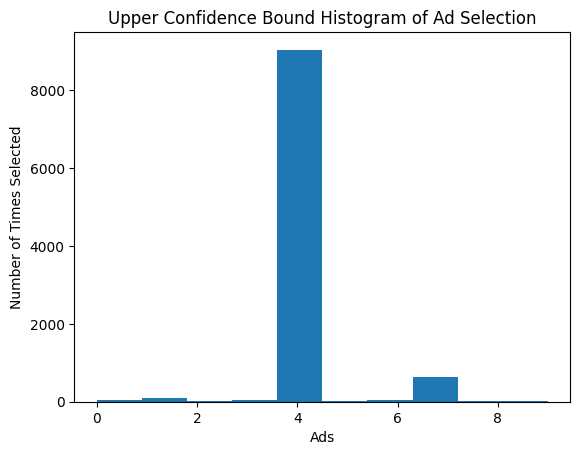

In [31]:
plt.hist(ads_selected)
plt.title('Upper Confidence Bound Histogram of Ad Selection')
plt.xlabel('Ads')
plt.ylabel("Number of Times Selected")
plt.show()